In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

В переменной df содержатся данные следующего вида:
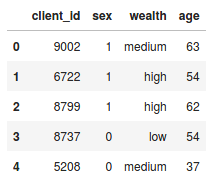
Отберите из них только те, где wealth принимает значение 'medium', а возраст составляет больше 35. Поместите результат в переменную medium_35.

In [2]:
df = pd.DataFrame(np.array([[9002, 1, "medium", 63],
                            [6722, 1, 'high', 54],
                            [8799, 1, 'high', 62],
                            [8737, 0, 'low', 54],
                            [5208, 0, 'medium', 37] ]),
                   columns=['client_id', 'sex', 'wealth', 'age'])

df

,client_id,sex,wealth,age
0,9002,1,medium,63
1,6722,1,high,54
2,8799,1,high,62
3,8737,0,low,54
4,5208,0,medium,37


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  5 non-null      object
 1   sex        5 non-null      object
 2   wealth     5 non-null      object
 3   age        5 non-null      object
dtypes: object(4)
memory usage: 288.0+ bytes


In [4]:
df["client_id"] = pd.to_numeric(df["client_id"])
df["sex"] = pd.to_numeric(df["sex"])
df["age"] = pd.to_numeric(df["age"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  5 non-null      int64 
 1   sex        5 non-null      int64 
 2   wealth     5 non-null      object
 3   age        5 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 288.0+ bytes


In [5]:
medium_35 = df.query('wealth == "medium" & age > 35')

In [6]:
medium_35

,client_id,sex,wealth,age
0,9002,1,medium,63
4,5208,0,medium,37


In [7]:
df['older_than_30'] = df['age'] > 30

In [8]:
df

,client_id,sex,wealth,age,older_than_30
0,9002,1,medium,63,True
1,6722,1,high,54,True
2,8799,1,high,62,True
3,8737,0,low,54,True
4,5208,0,medium,37,True


In [9]:
unique_num = df.nunique()
unique_num

client_id        5
sex              2
wealth           3
age              4
older_than_30    1
dtype: int64

А теперь создадим свою собственную функцию! Напишите функцию read_n_agg, которая:

принимает на вход один параметр – путь к файлу
считывает переданный файл, в котором разделителем является ;
считает средний заработок (income) по каждой компании (company), перенося колонку company в индекс (as_index=True)
возвращает результат этих действий (агрегированный датафрэйм)

In [30]:
df2 = pd.read_csv('/Users/pahkao/python_scripts/companies.csv', sep=';')
df2

,company,income,date
0,"ЗАО «Доронин, Колобов и Калашникова»",1221331958,2019-09-09
1,ООО «Авдеев»,21116804375,1972-12-21
2,РАО «Аксенов Сорокина»,79257158759,2007-03-05
3,Ларионов Инкорпорэйтед,36799366126,2011-08-11
4,Григорьев Инкорпорэйтед,48201837498,1989-09-02
...,...,...,...
288,Сэтл групп,6152279994,2004-03-30
289,ОАО «Горшков Чернов»,26623978007,2004-03-30
290,НПО «Фадеев»,84314056422,1998-09-03
291,Петролеум Трейдинг,95528839292,1975-01-31


In [37]:
def read_n_agg(file_path):
    df3 = pd.read_csv(file_path, sep=';')
    return df3.groupby('company', as_index=True).agg({'income': 'mean'})
#     return final_df
read_n_agg('/Users/pahkao/python_scripts/companies.csv')

,income
company,
En +,9.962187e+10
"АО «Александрова, Савельев и Мельникова»",7.206782e+10
АО «Андреев-Анисимов»,6.931948e+09
АО «Андреев-Макарова»,8.934380e+10
АО «Большаков Кошелева»,7.860861e+10
...,...
Щекиноазот,4.309092e+10
Щукин Лимитед,6.703036e+10
Эйвон Бьюти Продактс Компани (Avon),2.503657e+10


Вернёмся к данным о поездках на такси. На этот раз – из Перу, с рейтингами водителей, пассажиров, координатами, и парой других деталей!
- journey_id – уникальный id поездки
- user_id – id пользователя
- driver_id – id водителя
- taxi_id – id машины
- icon – тип поездки
- start_type – тип заказа (asap, reserved, delayed)
- start_at – время начала поездки
- start_lat – исходное местоположение пользователя, широта
- start_lon – исходное местоположение пользователя, долгота
- end_at – время окончания поездки
- end_lat – итоговое местоположение, широта
- end_lon – итоговое местоположение, долгота
- end_state – состояние заказа
- driver_start_lat – исходное местоположение водителя, широта
- driver_start_lon – исходное местоположение водителя, долгота
- arrived_at – время прибытия водителя
- source – платформа, с которой сделан заказ
- driver_score – оценка водителя клиентом
- rider_score – оценка клиента водителем
---
Импортируйте `pandas` как `pd`. Загрузите датасет, используя ; в качестве разделителя. Также укажите, что столбцы `start_at`, `end_at`, `arrived_at` нужно прочитать как даты (параметр `parse_dates`). Результат запишите в `taxi`.

In [11]:
url = 'https://stepik.org/media/attachments/lesson/359240/taxi_peru.csv'
taxi = pd.read_csv(url, sep=';', parse_dates=['start_at','end_at', 'arrived_at'])
taxi.head()


,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


Проверьте, с какой платформы было сделано больше всего заказов. В ответе укажите значение в %, округлённое до целого.

In [12]:
(
    taxi
        .source
        .value_counts(normalize=True)
        .mul(100)
        .max()
)

42.374282234209154

Чтобы показать разницу более наглядно, попробуем визуализировать показатели.

Агрегируйте данные и постройте барчарт, где по оси x будет расположено название платформы (`source`), а по оси y – количество заказов (абсолютные значения)

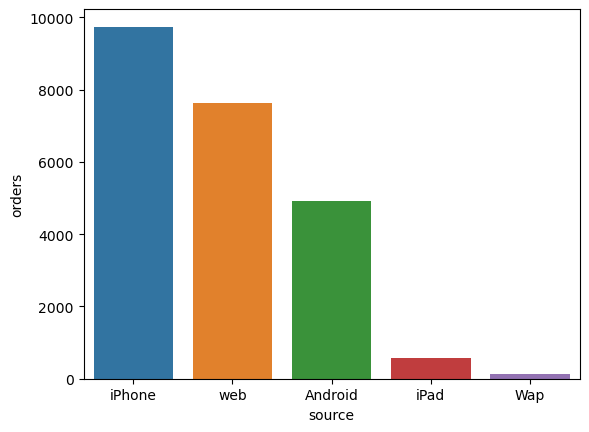

In [20]:
orders_by_platform = (
    taxi
        .groupby('source', as_index=False)
        .agg({'user_id': 'count'})
        .rename(columns={'user_id': 'orders'})
        .sort_values('orders', ascending=False)
)

ax = sns.barplot(data=orders_by_platform, x='source', y='orders')

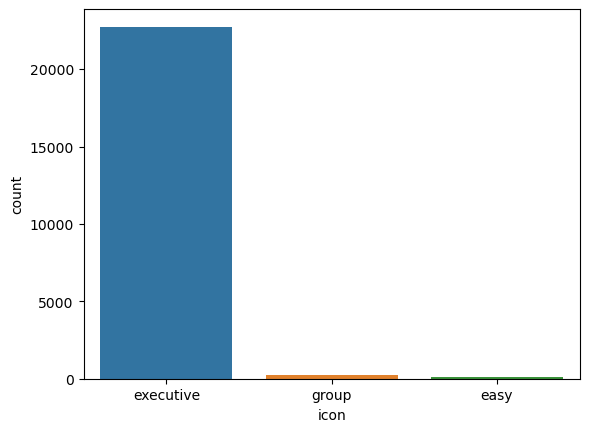

In [30]:
ax = sns.countplot(x=taxi['icon'])

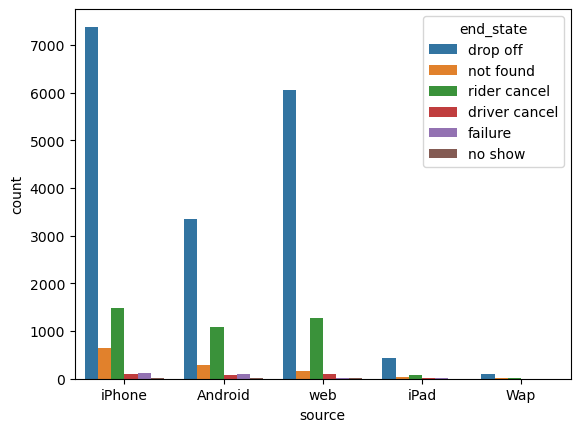

In [31]:
ax = sns.countplot(x=taxi['source'], hue=taxi['end_state'])

Проверим, как распределены оценки водителей (driver_score). Для подготовки данных выполните следующие шаги:

1. Посчитайте частоту встречаемости каждой из оценок
2. Переведите в проценты и округлите до 2 знаков после точки (.mul(100).round(2))
3. Сбросьте индексы
4. Переименуйте колонки в driver_score и percentage
5. Отсортируйте по driver_score в порядке возрастания (от 0 до 5)
6. Запишите результат в driver_score_counts

Полезные функции:

- .mul() – умножение, более удобный вариант для использования в цепочке методов 
- .round() – округление
- .reset_index() – сбросить индекс
- .value_counts() – сколько раз встречается каждое значение переменной

In [32]:
taxi.head(2)

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN


In [68]:
driver_score_counts = (
        taxi
        .driver_score
        .value_counts(normalize=True, dropna=True)
        .mul(100)
        .round(2)
        .reset_index()
        .rename(columns={'driver_score': 'percentage', 'index': 'driver_score'})
        .sort_values('driver_score', ascending=True)
)

In [69]:
driver_score_counts

,driver_score,percentage
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81


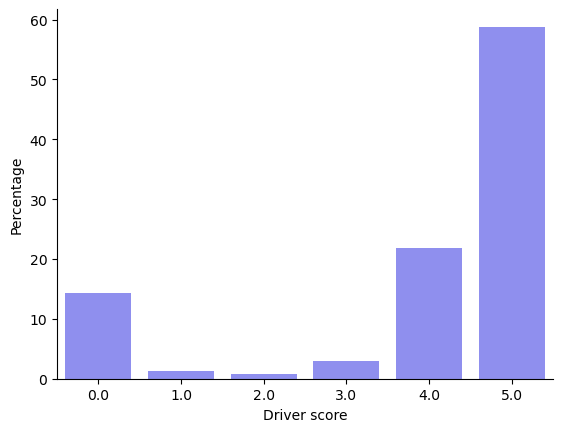

In [71]:
ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

Проделайте аналогичные шаги для rider_score (оценок клиентов водителями), не забыв построить график. В чем его отличие от распределения оценок водителей?

In [74]:
rider_score_counts = (
        taxi
        .rider_score
        .value_counts(normalize=True, dropna=True)
        .mul(100)
        .round(2)
        .reset_index()
        .rename(columns={'rider_score': 'percentage', 'index': 'rider_score'})
        .sort_values('rider_score', ascending=True)
)

In [75]:
rider_score_counts

,rider_score,percentage
2,0.0,2.29
4,1.0,0.21
5,2.0,0.19
3,3.0,1.38
1,4.0,8.83
0,5.0,87.10


In [76]:
driver_score_counts

,driver_score,percentage
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81


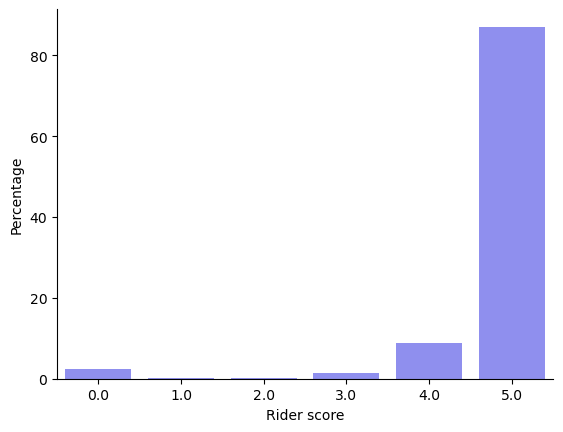

In [77]:
ax = sns.barplot(x='rider_score', y='percentage', data=rider_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Rider score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()